# Loading and validating data

In [ ]:
#importing the required libraries
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [ ]:
#loading the csv
dataset = pd.read_csv('/content/shopping_trends_updated.csv')
dataset.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [ ]:
dataset.columns

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Shipping Type',
       'Discount Applied', 'Promo Code Used', 'Previous Purchases',
       'Payment Method', 'Frequency of Purchases'],
      dtype='object')

In [ ]:
dataset.isna().sum()
dataset.dtypes

,0
Customer ID,int64
Age,int64
Gender,object
Item Purchased,object
Category,object
Purchase Amount (USD),int64
Location,object
Size,object
Color,object
Season,object


In [ ]:
#stripping the column names
dataset.columns = dataset.columns.str.strip()

In [ ]:
#converting non-numeric columns to categorical datatype
cat_columns = ['Gender', 'Item Purchased', 'Category', 'Size', 'Color', 'Season', \
               'Subscription Status', 'Shipping Type', 'Promo Code Used', 'Payment Method', 'Frequency of Purchases']
num_columns = ['Age', 'Purchase Amount (USD)', 'Review Rating', 'Previous Purchases' ]
for column in cat_columns:
    dataset[column] = dataset[column].astype('category')

In [ ]:
dataset.dtypes

,0
Customer ID,int64
Age,int64
Gender,category
Item Purchased,category
Category,category
Purchase Amount (USD),int64
Location,object
Size,category
Color,category
Season,category


# EDA

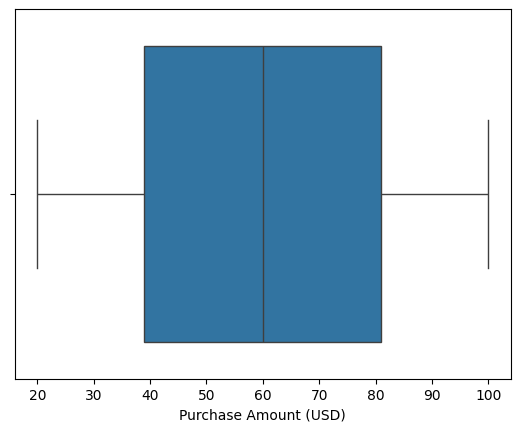

In [ ]:
# insights about Purchase Amount columns
sns.boxplot(x='Purchase Amount (USD)', data = dataset)
plt.xlabel('Purchase Amount (USD)')
plt.show()

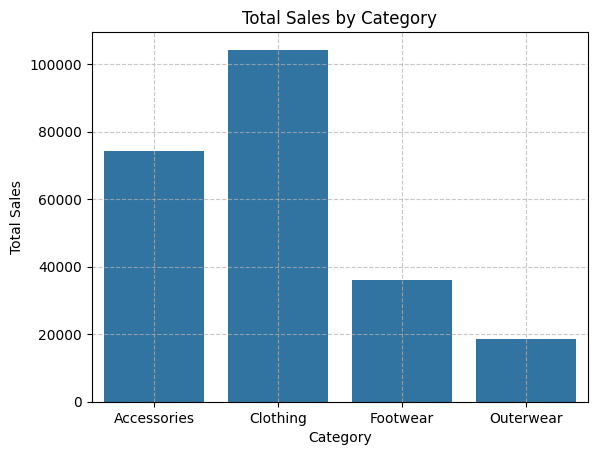

In [ ]:
#relationship between purchase amount and category
df_gp_category = dataset.groupby('Category')['Purchase Amount (USD)'].sum().reset_index()
sns.barplot(x='Category', y='Purchase Amount (USD)', data=df_gp_category)
plt.title('Total Sales by Category')
plt.xlabel('Category')
plt.ylabel('Total Sales')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

**`Clothing Category earns maximum revenue.`**

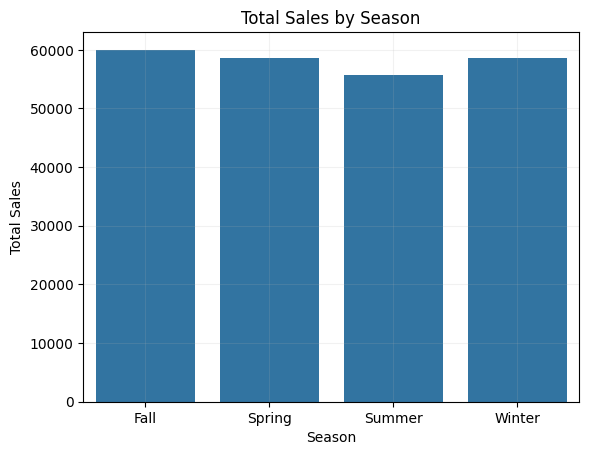

In [ ]:
#seasons and Purchase Amount
df_gp_season = dataset.groupby('Season')['Purchase Amount (USD)'].sum().reset_index()
sns.barplot(x='Season', y='Purchase Amount (USD)', data=df_gp_season)
plt.title('Total Sales by Season')
plt.xlabel('Season')
plt.ylabel('Total Sales')
plt.grid(True, linestyle='-', alpha=0.17)
plt.show()

**`The sales across seasons are almost similar with a slight dip in summer.`**

In [ ]:
#relationship of Purchase amount with category, seasons
fig = px.box(dataset, x='Category', y='Purchase Amount (USD)', color='Season')
fig.update_layout(title='Purchase Amount by Category and Season', xaxis_title='Category', yaxis_title='Purchase Amount (USD)')
fig.show()

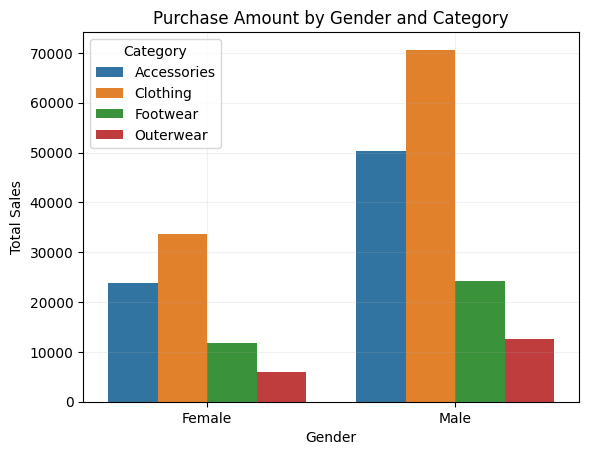

In [ ]:
#Gender and Purchase amount
df_gp_gender = dataset.groupby(['Gender', 'Category'])['Purchase Amount (USD)'].sum().reset_index()
sns.barplot(x='Gender', y='Purchase Amount (USD)', data=df_gp_gender, hue='Category')
plt.grid(True, linestyle='-', alpha=0.17)
plt.title('Purchase Amount by Gender and Category')
plt.xlabel('Gender')
plt.ylabel('Total Sales')
plt.show()



`Sales to Male customers is more than double to that to Female customers.`

`Clothing Category secures the highest revenue in both the genders. `



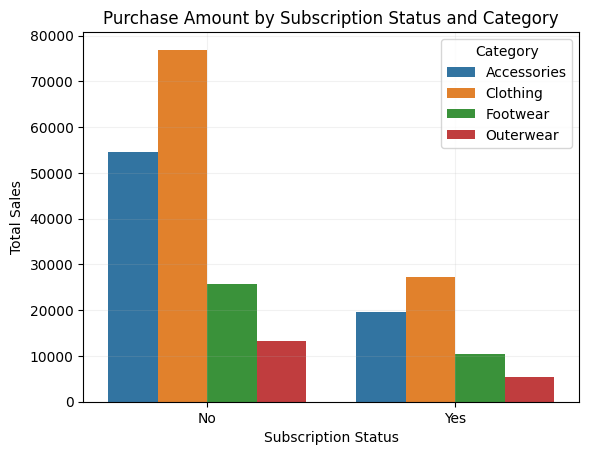

In [ ]:
#Total Sales and Subcription status
df_gp_subscription = dataset.groupby(['Subscription Status', 'Category'])['Purchase Amount (USD)'].sum().reset_index()
sns.barplot(x='Subscription Status', y='Purchase Amount (USD)', data=df_gp_subscription, hue='Category')
plt.grid(True, linestyle='-', alpha=0.17)
plt.title('Purchase Amount by Subscription Status and Category')
plt.xlabel('Subscription Status')
plt.ylabel('Total Sales')
plt.show()

**`Sales from subscribed customers are far less than that of the non subscribed customers with distibution in the categories remainng similar.`**

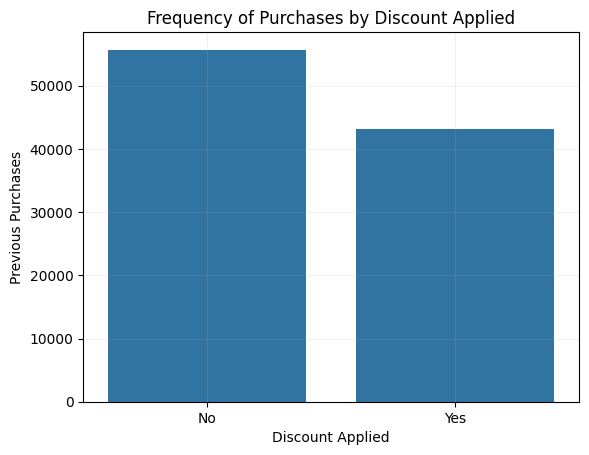

In [ ]:
#Frequency of purchases and discount applied
df_gp_discount = dataset.groupby('Discount Applied')['Previous Purchases'].sum().reset_index()
sns.barplot(x='Discount Applied', y='Previous Purchases', data=df_gp_discount)
plt.title('Frequency of Purchases by Discount Applied')
plt.xlabel('Discount Applied')
plt.ylabel('Previous Purchases')
plt.grid(True, linestyle='-', alpha=0.17)
plt.show()

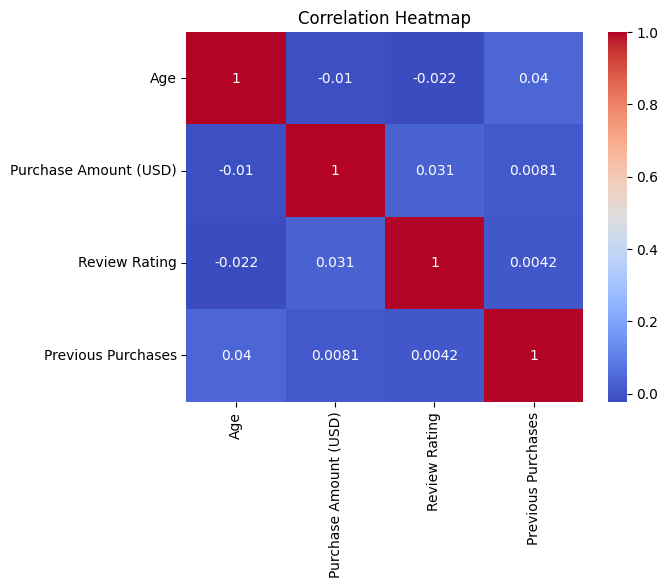

In [ ]:
#correlation of purchase amount with other variables.
corr_matrix = dataset[num_columns].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()